<h1> Project Description </h1>
In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv(r"C:\Users\Daniel\My_Datasets\dete_survey.csv", encoding = 'UTF-8')

tafe_survey = pd.read_csv(r"C:\Users\Daniel\My_Datasets\tafe_survey.csv", encoding = 'unicode_escape')

dete_survey.info()
dete_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [3]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True


Colums that I don't need are 'Region', 'Business Unit', 'Employment Status', 'Kept Informed', 'Wellness programs', 'Health & Safety', 'Gender', 'Age', 'Aboriginal', 'Torret Strait', 'South Sea', 'Disability', ' and 'NESB'.

In [4]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


I don't think I need the workplace topics columns.

It looks like dete_survey has 'Not Stated' values that aren't read as NaN. I am going to reread the csv file and read the 'Not Stated' value as NaN.

In [5]:
dete_survey = pd.read_csv(r"C:\Users\Daniel\My_Datasets\dete_survey.csv", na_values = 'Not Stated')

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [7]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

For DETE and TAFE Exit Surveys, got rid of InstituteViews,WorkUnitViews, InductionInfo,WorkPlaceTopic columns because they are not relatd to the question of dissatisfaction. Both exit surveys ask a lot of the same questions worded differently that don't relate to the questions of stakeholders.

**To eventually merge the two datasets, I need to standardize the columns for both of them**

In [8]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('.','_').str.replace('\s+','_').str.strip().str.lower()

In [10]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [12]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('.','_').str.replace('\s+','_').str.strip().str.lower()

In [13]:
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors__career_move_-_public_sector_',
       'contributing_factors__career_move_-_private_sector_',
       'contributing_factors__career_move_-_self-employment',
       'contributing_factors__ill_health',
       'contributing_factors__maternity/family',
       'contributing_factors__dissatisfaction',
       'contributing_factors__job_dissatisfaction',
       'contributing_factors__interpersonal_conflict',
       'contributing_factors__study', 'contributing_factors__travel',
       'contributing_factors__other', 'contributing_factors__none',
       'gender__what_is_your_gender?', 'currentage__current_age',
       'employment_type__employment_type', 'classification__classification',
       'lengthofserviceoverall__overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent__length_of_service_at_current_workplace_(in_years)'],
      dtype='ob

In [14]:
tafe_survey_updated.rename(columns = {'record_id': 'id',
'cessation_year': 'cease_date',
'reason_for_ceasing_employment': 'separationtype',
'gender__what_is_your_gender?': 'gender',
'currentage__current_age': 'age',
'employment_type__employment_type': 'employment_status',
'classification__classification': 'position',
'lengthofserviceoverall__overall_length_of_service_at_institute_(in_years)': 'institute_service'}, inplace = True)

In [15]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors__career_move_-_public_sector_',
       'contributing_factors__career_move_-_private_sector_',
       'contributing_factors__career_move_-_self-employment',
       'contributing_factors__ill_health',
       'contributing_factors__maternity/family',
       'contributing_factors__dissatisfaction',
       'contributing_factors__job_dissatisfaction',
       'contributing_factors__interpersonal_conflict',
       'contributing_factors__study', 'contributing_factors__travel',
       'contributing_factors__other', 'contributing_factors__none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'lengthofservicecurrent__length_of_service_at_current_workplace_(in_years)'],
      dtype='object')

Columns were cleaned and renamed for better analyzing and consistency of column names across datasets

Next, let's remove some of the data that we don't need. One thing that immediately stands out in the DETE survey is that there are three types of 'Resignations'. These thre subcategories need to be put into one broad category for data cleaning purposes and will not impact our final analysis

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [19]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Reisgnation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

<h1> Data Verification </h1>
<br>
Need to check for any major inconsistencies/corrupt data

In [20]:
dete_resignations['cease_date'].value_counts()

Series([], Name: cease_date, dtype: int64)

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_values()


Series([], Name: dete_start_date, dtype: int64)

In [23]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

**Findings**
<br>
The DETE survey has way more amount of years than the TAFE survey. Had we wanted to merge the two surveys using  'year' as an index, this would have been a problem. Because we are concerned with employmee dissatisfaction, the disparity in the amount of years covered between the two surveys won't bug us.

**Next Step** Need to find the length an employee was employed for in the DETE survey. The TAFE survey has that in a column that we renamed  from 'lengthofserviceoverall__overall_length_of_service_at_institute_(in_years)' to 'institute_service'.
<br> 
Need to do the same for the DETE survey by subtracting the cease_date from the start date

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

Series([], Name: institute_service, dtype: float64)

<h1> Identify Dissatisfied Employees </h1>
<br>
To identify dissatisfied employees from both datasets, use the following columns
<br><br>
**tafe_survey_updated**:
<ol>
    <li> contributing_factors__dissatisfaction </li>
    <li> contributing_factors__job_dissatisfaction </li>
</ol>
<br><br>

**dafe_survey_updated**:
<ol>
    <li> job_dissatisfaction </li>
    <li> dissatisfaction_with_the_department </li>
    <li> physical_work_environment </li>
    <li> lack_of_recognition </li>
    <li> lack_of_job_security </li>
    <li> work_location </li>
    <li> employment_conditions </li>
    <li> work_life_balance </li>
    <li> workload </li>
</ol>
<br><br>
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:
<br><br>
**True**: indicates a person resigned because they were dissatisfied in some way<br>
**False**: indicates a person resigned because of a reason other than dissatisfaction with the job <br>
**NaN**: indicates the value is missing <br>

In [25]:
tafe_resignations['contributing_factors__dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors__dissatisfaction, dtype: int64

In [26]:
tafe_resignations['contributing_factors__job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors__job_dissatisfaction, dtype: int64

In [27]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors__dissatisfaction', 'contributing_factors__job_dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

Series([], Name: dissatisfied, dtype: int64)

Now that we've identified the amount of dissatisfied employees in both data sets, we can turn out attention to combining the data

<h1> Combining Data </h1>
To combine the datasets, it would help to differentiate between the DETE and TAFE institutes

In [29]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values(ascending = False)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


workarea                                                                     340
id                                                                           340
institute                                                                    340
separationtype                                                               340
cease_date                                                                   335
contributing_factors__interpersonal_conflict                                 332
contributing_factors__ill_health                                             332
contributing_factors__travel                                                 332
contributing_factors__study                                                  332
contributing_factors__other                                                  332
contributing_factors__none                                                   332
contributing_factors__maternity/family                                       332
contributing_factors__job_di

Now let's drop columns that we don't really need. Anything less than 290 non null values will be dropped.

In [37]:
# Drop columns that  have less than 290 non null values
combined_updated = combined.dropna(thresh = 289, axis =1).copy()

<h1> Cleaning the Institute Service column </h1>
The current stage of the 'institute_service' column is inconsistent and needs to be standardized. I am going to use <a  href="https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage"> this article </a> to categorize years of service into:
<br>
<ol>
    <li>New: Less than 3 years at a company</li>
    <li>Experienced: 3-6 years at a company</li>
    <li>Established: 7-10 years at a company</li>
    <li>Veteran: 11 or more years at a company</li>
</ol>

In [32]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service_up, dtype: int64

In [33]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            137
Experienced     96
Veteran         36
Established     21
Name: service_cat, dtype: int64

<h1>Perform Some Initial Analysis</h1>
<br><br>Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.
<br><br>
Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

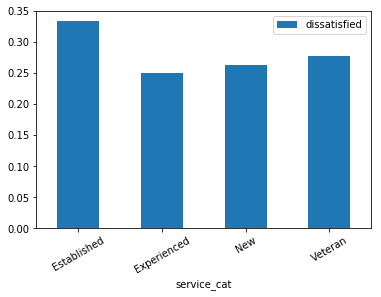

In [36]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

**Tentative Conclusion**
Need to analyze the rest of the missing data to finalyze an analysis, but the data shows that established employees between 7 and 11 years worth of experience lead the groups 
<br><br>
**Impact** Focus on communicating with established employees to better understand their needs and wants, saving management time and energy by not focusing on the new, experienced, and veteran catgory of employees.
<br>
<br>
As per <a href="ttps://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage"> this article that I cited earlier:</a>
<br><br>
<q>The top motivator for 58 percent of employees in the tenured stage is to contribute to the company’s overall goals. They <i> focus more on what success looks like, are motivated by public recognition and promotion and seek ownership over specific projects or teams</i>. **The biggest challenge for the tenured stage is combatting stagnation and feeling “stuck.”** It’s important for them to have open, direct conversations with their managers to help look for opportunities to further their career and find ways to overcome any barriers. </q>